# Fig. 7: Frequency Change $\Delta f$ vs. Lateral Particle Position

This notebook reproduces Fig. 7 in the paper, which shows the the frequency change $\Delta f$ as a function of lateral particle position $x$ for the first five eigenmodes (N = 1 - 5), with the MNP either above the major axis of the ellipse (y = 0 nm) or shifted by 20 nm in y-direction. The frequency change for each mode is shown for three values of the nanoparticle-disc separation: d = 5 nm, d = 20 nm, d = 50 nm.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from style_helpers import style_cycle_fig7

%matplotlib inline
plt.style.use('style_sheets/fig7.mplstyle')

Define which values of $z$, $y$ and $N$ are going to appear in the figure.

In [2]:
dvals = [5, 20, 50]
yvals = [0, 20]
Nvals = [1, 2, 3, 4, 5]

Read the data frame with the eigenmode data and filter out the parameter values relevant for this plot.

In [3]:
df = pd.read_pickle('../data/eigenmode_info_data_frame.pickle')
df = df.query('(has_particle == True) & (d_particle == 20) & (Ms_particle == 1e6) & '
              '(d in [5, 20, 50]) & (Hz == 8e4)')
df = df.sort_values('x')

Define a series of helper functions.

In [4]:
def draw_zero_line(ax):
    """
    Draw a horizontal line representing delta_f = 0.
    """
    ax.plot([-90, 90], [0, 0], color='#888888', linestyle='-', linewidth=1)

In [5]:
def add_y_value_annotation(ax, y):
    """
    Add annotation to indicate y-value used in this row
    of subplots. Example: "y = 20 nm"
    """
    ax.annotate(r'$y={y:d}$ nm'.format(y=y), xy=(1.00, 0.5), xytext=(15, 0),
                ha='left', va='center', rotation=90,
                xycoords='axes fraction', textcoords='offset points', fontsize=18)

In [6]:
def adjust_subplot_appearance(ax):
    """
    Set correct axis limits and ticks positions for subplot.
    """
    ax.set_xticks([-60, 0, 60])
    ax.set_yticks([-300, 0, 300, 600])
    ax.set_ylim((-75, 625))
    ax.xaxis.set_ticks_position('bottom' if i == 1 else 'none')
    ax.yaxis.set_ticks_position('left' if j == 0 else 'none')

In [7]:
def get_data_values_for_subplot(df, y, d, N):
    """
    Filter the data frame `df` to obtain the values of `x` and `delta_f`
    for the subplot corresponding to the given values of `y`, `d`, `N`.
    """
    query_string = '(y == {y}) and (d == {d}) and (N == {N})'.format(y=y, d=d, N=N)
    df_subplot = df.query(query_string)
    xvals = df_subplot['x']
    fvals = df_subplot['freq_diff'] * 1e3  # in MHz, not GHz
    return xvals, fvals

In [8]:
def draw_subplot(df, axes, i, j, y, N):
    """
    Draw the three curves (for d = 5 nm, 20 nm, 50 nm) into each subplot.
    """
    ax = axes[i, j]

    draw_zero_line(ax)
    adjust_subplot_appearance(ax)

    for d, style in zip(reversed(dvals), style_cycle_fig7):
        xvals, fvals = get_data_values_for_subplot(df, y, d, N)
        line, = ax.plot(xvals, fvals, label='d={d} nm'.format(d=d), **style)
        if style['linestyle'] == 'dashed':
            line.set_dashes([5, 4])  # 5 points on, 4 off

In [9]:
def add_column_titles(axes):
    """
    Add titles "N=1", "N=2", etc. to the columns.
    """
    for N in Nvals:
        ax = axes[0, N-1]
        ax.set_title(r'N$={N}$'.format(N=N), y=1.15)

In [10]:
def add_axis_labels(axes):
    """
    Set overall axis labels.
    
    Horizontal axis: "x (nm)"
    Vertical axis: "\Delta f (MHz)"
    """
    axes[1, 2].set_xlabel('x (nm)')
    axes[0, 0].annotate(r'$\Delta f$ (MHz)',
                        xy=(-0.5, 0.4), xytext=(0, 0), ha='right', va='top', rotation=90,
                        xycoords='axes fraction', textcoords='offset points', fontsize=20)

In [11]:
def add_legend(axes):
    """
    Add legend in top right corner of the grid.
    """
    # We reverse the labels so that they appear in the natural order
    # with "d = 5 nm" at the top and "d = 20 nm" at the bottom.
    handles, labels = axes[0, 4].get_legend_handles_labels()
    axes[0, 4].legend(handles[::-1], labels[::-1], loc='upper right', bbox_to_anchor=(1.0, 1.18), handlelength=2)

Finally we can produce the plot for Fig. 7.

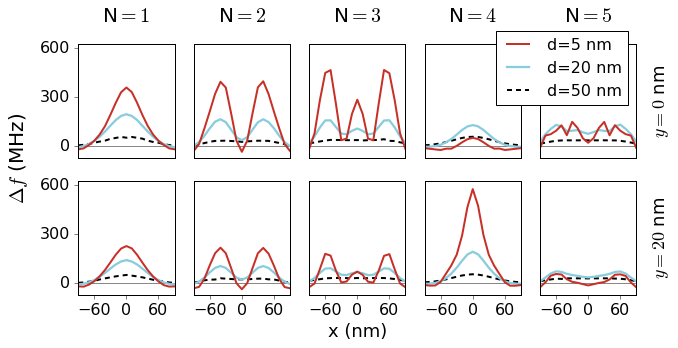

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10, 4.5))

for i, y in enumerate(yvals):
    for j, N in enumerate(Nvals):
        draw_subplot(df, axes, i, j, y, N)

add_y_value_annotation(axes[0, 4], y=0)
add_y_value_annotation(axes[1, 4], y=20)
add_column_titles(axes)
add_axis_labels(axes)
add_legend(axes)